## Creating the CelebA Dataset in h3 format
### Download the following files:
- https://googledrive.com/host/0B7EVK8r0v71pTUZsaXdaSnZBZzg/img_align_celeba.zip
- https://googledrive.com/host/0B7EVK8r0v71pOC0wOVZlQnFfaGs/list_attr_celeba.txt
- The dropbox version is not working as of now, but it you can wget it:
    - `!wget "https://www.dropbox.com/sh/8oqt9vytwxb3s4r/AADIKlz8PR9zr6Y20qbkunrba/Img/img_align_celeba.zip"`


In [1]:
# This unzips the file in the command line
!unzip -q "img_align_celeba.zip" 

In [2]:
from glob import glob
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline  
import os
import pandas as pd
import h5py
import tqdm

In [3]:
data = glob(os.path.join("img_align_celeba", "*.jpg"))

In [4]:
data = np.sort(data)

In [5]:
data[0:10]

array(['img_align_celeba/000001.jpg', 'img_align_celeba/000002.jpg',
       'img_align_celeba/000003.jpg', 'img_align_celeba/000004.jpg',
       'img_align_celeba/000005.jpg', 'img_align_celeba/000006.jpg',
       'img_align_celeba/000007.jpg', 'img_align_celeba/000008.jpg',
       'img_align_celeba/000009.jpg', 'img_align_celeba/000010.jpg'], 
      dtype='|S27')

In [6]:
len(data)

202599

In [7]:
def imread(path):
    return scipy.misc.imread(path).astype(np.float)

def resize_width(image, width=64.):
    h, w = np.shape(image)[:2]
    return scipy.misc.imresize(image,[int((float(h)/w)*width),width])
        
def center_crop(x, height=64):
    h= np.shape(x)[0]
    j = int(round((h - height)/2.))
    return x[j:j+height,:,:]

def get_image(image_path, width=64, height=64):
    return center_crop(resize_width(imread(image_path), width = width),height=height)


In [8]:
dim = 64

In [9]:
test = get_image(data[0],dim,dim)

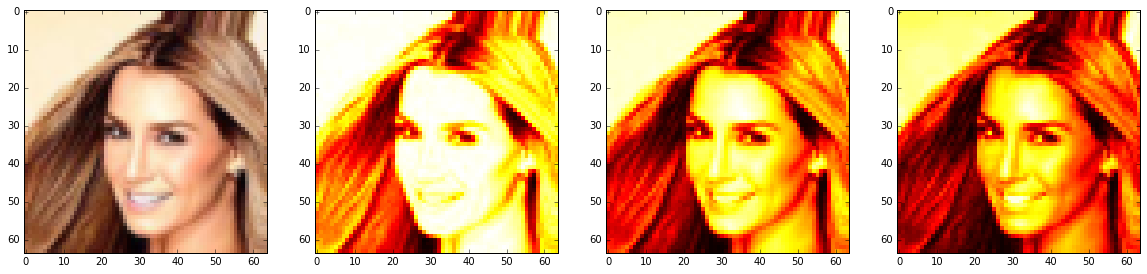

In [10]:
cm = plt.cm.hot
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,8))
ax[0].imshow(np.reshape(test, (dim,dim,3)), interpolation='nearest')
ax[1].imshow(np.reshape(test, (dim,dim,3))[:,:,0], interpolation='nearest', cmap=cm)
ax[2].imshow(np.reshape(test, (dim,dim,3))[:,:,1], interpolation='nearest', cmap=cm)
ax[3].imshow(np.reshape(test, (dim,dim,3))[:,:,2], interpolation='nearest', cmap=cm)

In [11]:
images = np.zeros((len(data),dim*dim*3), dtype = np.uint8)

In [12]:
# make a dataset
for i in tqdm.tqdm(range(len(data))):
    #for i in tqdm.tqdm(range(10)):
    image = get_image(data[i], dim,dim)
    images[i] = image.flatten()
    # get the metadata

100%|██████████| 202599/202599 [09:44<00:00, 346.46it/s]


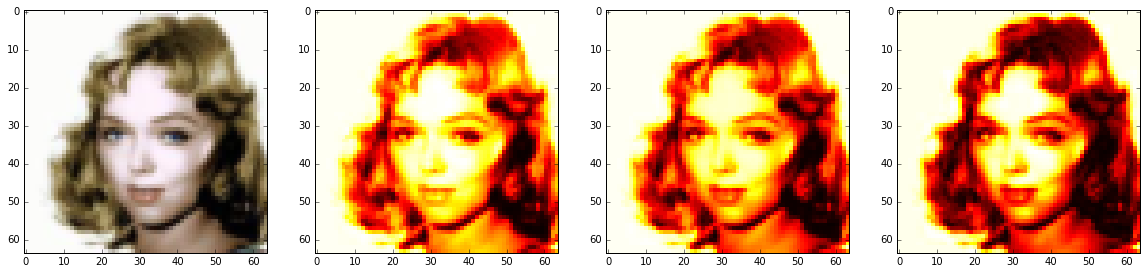

In [13]:
test = images[i].reshape(dim,dim,3)
#test = image.flatten()
cm = plt.cm.hot
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,8))
ax[0].imshow(np.reshape(test, (dim,dim,3)), interpolation='nearest')
ax[1].imshow(np.reshape(test, (dim,dim,3))[:,:,0], interpolation='nearest', cmap=cm)
ax[2].imshow(np.reshape(test, (dim,dim,3))[:,:,1], interpolation='nearest', cmap=cm)
ax[3].imshow(np.reshape(test, (dim,dim,3))[:,:,2], interpolation='nearest', cmap=cm)

In [19]:
attribute_file = 'list_attr_celeba.txt'

In [20]:
with open(attribute_file, 'r') as f:
    num_examples = f.readline()
    headers = f.readline()

In [21]:
headers = headers.split()
print(headers)

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [22]:
label_input = pd.read_fwf(attribute_file,skiprows=2,
                       widths = [10,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3, 
                                 3,3,3,3,3,3,3,3,3,3,3],
                   index_col=0,
                   header=None
                  )

In [23]:
# the labels for each input
labels = label_input.astype(int).as_matrix()

In [24]:
headers

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [25]:
with h5py.File(''.join(['datasets/faces_dataset_new.h5']), 'w') as f:
    dset_face = f.create_dataset("images", data = images)
    dset_headers = f.create_dataset('headers', data = headers)
    dset_label_input = f.create_dataset('label_input', data = label_input)

In [26]:
# now reading the dataset is simple...
with h5py.File(''.join(['datasets/faces_dataset_new.h5']), 'r') as hf:
    faces = hf['images'].value
    headers = hf['headers'].value
    labels = hf['label_input'].value

### Lets take a look at some bald people

In [27]:
bald_people = faces[labels[:,4]==1][0:4]

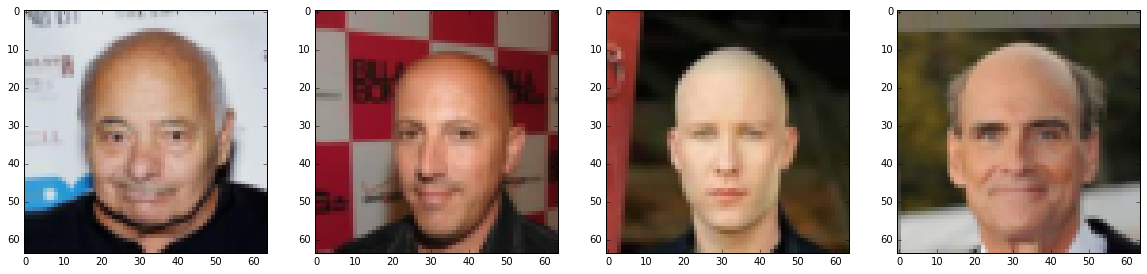

In [28]:
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,8))
ax[0].imshow(np.reshape(bald_people[0], (dim,dim,3)), interpolation='nearest')
ax[1].imshow(np.reshape(bald_people[1], (dim,dim,3)), interpolation='nearest', cmap=cm)
ax[2].imshow(np.reshape(bald_people[2], (dim,dim,3)), interpolation='nearest', cmap=cm)
ax[3].imshow(np.reshape(bald_people[3], (dim,dim,3)), interpolation='nearest', cmap=cm)